# Project \#2

This project is about processing a data set and testing how differently processed datasets fit the neural network.
<br>
My choice is the [Wine Quality Dataset](https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download)

<br>

### Cleaning the dataset

The Dataset contains data about 6497 wines, however, some of the wines have missing statistics. Some of the columns contain missing cells. The most that one column is missing is 10. If every missing cell deleted equaled to one wine deleted, it would remove maximum of 38 rows. 

It's not a lot considering the fact that we have data for 6.5k wines, but I wanted to use all the data I have. 

I decided to fill the missing cells with the mean of the column. The mean is calculated only from the cells that are not missing. The mean is calculated for each column separately.

The dataset contains columns like: acidity, sugar, sulfur dioxides, ph, density and of course, quality.

### Reading the CSV file

Im using the pandas package to read and process the CSV file

In [12]:
import numpy as np
import pandas as pd

# File path
file_path = 'C:\\Users\\barto\\Desktop\\Programowanie\\2Rok\\4Semestr\\inteligencja-obliczeniowa\\project2\\winequalityN.csv'

wine_dataset = pd.read_csv(file_path)

As shown in the code, there are 38 cells missing in the dataset.

In [13]:
print(wine_dataset.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


As you can see I can get every value in the column and sum the values that repeat. This enables me to check whether the mean is correct.

In [14]:
print(wine_dataset["fixed acidity"].value_counts())

fixed acidity
6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: count, Length: 106, dtype: int64


## Filling missing cells

I decided to fill the missing cells with the mean of the column where the missing cell belongs. I used the pandas package mean() method to get the mean of all the values in the column. Then I filled all the missing values with .fillna() method with the mean value.

As shown below, all the missing cells were filled.

In [15]:
# Fill missing values with mean column values in the dataset (using [1:] indexing to exclude the 'type' column)
for column in wine_dataset.columns[1:]:
    # Mean of the given column
    mean = wine_dataset[column].mean()
    # Filling the missing values with the mean value of the column
    wine_dataset[column].fillna(mean, inplace=True)

print(wine_dataset.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Data processing

For processing type I decided to use 0/1 values as there are only 2 wine types: white and red.

In [16]:
import sklearn.preprocessing as preprocessing

# LabelEncoder transforms data into values between 0 and n_classes-1, in this case we have 2 classes so it outputs only 0 and 1 values.
le = preprocessing.LabelEncoder()
type_encoded = le.fit_transform(wine_dataset['type'])
type_encoded = pd.DataFrame(type_encoded, columns=['type'])

wine_dataset['type'] = type_encoded

As you can see below, type "white" changed to 0

In [17]:
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


And type "red" changed to 1

In [18]:
wine_dataset.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.660000,11.0,6


### Deleting edge cases

A good idea to train a neural network is to delete the edge cases. To show the edge cases we can plot them with a boxplot.

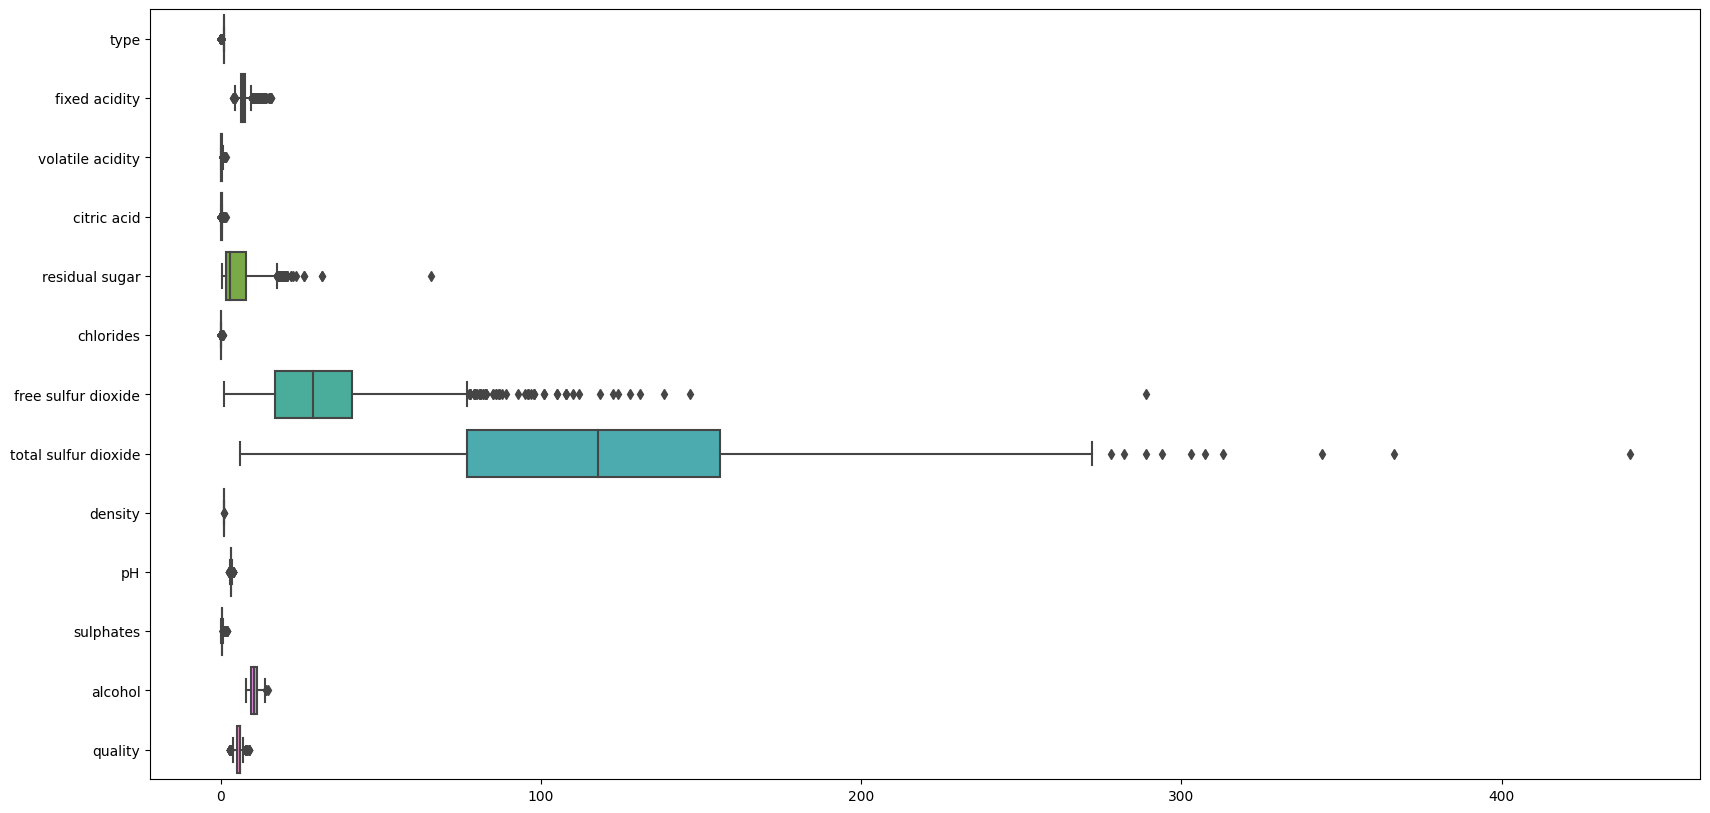

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))
sns.boxplot(data = wine_dataset, orient = 'h')
plt.show()

## Feature selection with ExtraTreesClassifier

In [20]:
X = wine_dataset.drop("quality", axis = True)
y = wine_dataset["quality"]

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X, y)

print(etc.feature_importances_)

[0.00778673 0.07867328 0.09978391 0.08144992 0.0838951  0.08114736
 0.08612366 0.08871753 0.09250741 0.08124425 0.08583713 0.13283371]


## Plot the importances of the features

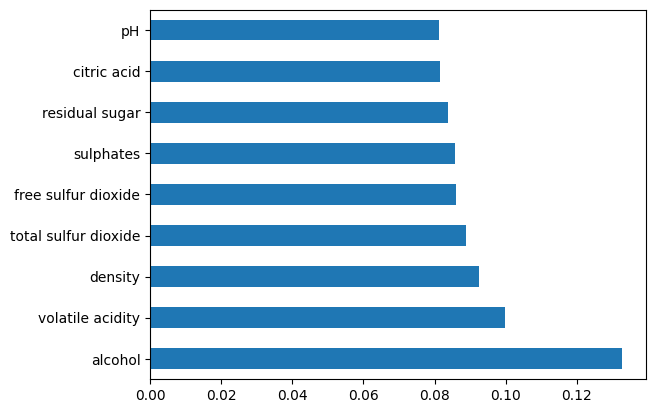

In [21]:
feature_importances = pd.Series(etc.feature_importances_, index = X.columns)
feature_importances.nlargest(9).plot(kind = "barh")
plt.show()

Now that the edge cases got deleted we can proceed to the next step.

## Normalizing the data in every column

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(wine_dataset)

# Displaying that the data got normalized
print(normalized_data)

[[1.         0.26446281 0.12666667 ... 0.12921348 0.11594203 0.5       ]
 [1.         0.20661157 0.14666667 ... 0.15168539 0.2173913  0.5       ]
 [1.         0.3553719  0.13333333 ... 0.12359551 0.30434783 0.5       ]
 ...
 [0.         0.20661157 0.28666667 ... 0.29775281 0.43478261 0.5       ]
 [0.         0.17355372 0.37666667 ... 0.2752809  0.31884058 0.33333333]
 [0.         0.18181818 0.15333333 ... 0.24719101 0.43478261 0.5       ]]


## Creating the training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

x = wine_dataset.iloc[:, 0:12].values
y = wine_dataset.iloc[:,-1:].values

# Test_size of 0.2 gives better results than 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=278830)

### Using PCA on the dataset

In [24]:
from sklearn.decomposition import PCA

# Make the dataset be 2D instead of 12D
pca = PCA()

X_train1 = pca.fit_transform(x_train)
X_test1 = pca.transform(x_test)

### Plotting all the relationshipts between the columns on 2D graphs

In [25]:
# sns.pairplot(wine_dataset_no_edge)
# plt.show()

## DecisionTreeClassifier

Accuracy: 0.6041025641025641


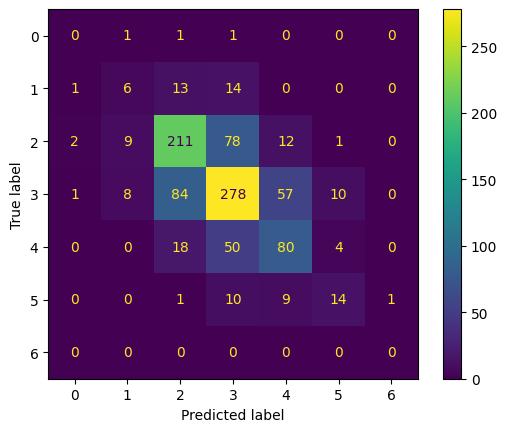

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dcf = DecisionTreeClassifier(criterion='entropy')
dcf.fit(X_train1, y_train)

y_pred = dcf.predict(X_test1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

## Naive Bayes

Accuracy: 0.518974358974359


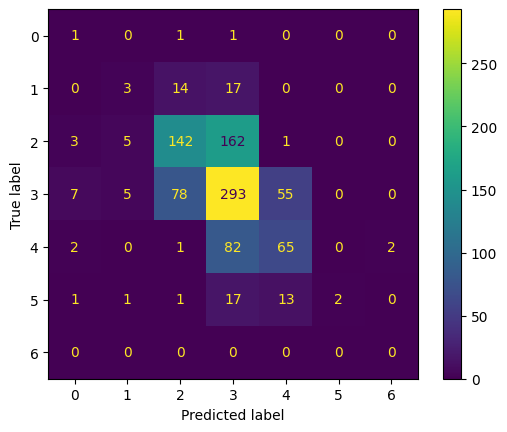

In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train1, y_train.ravel())

y_pred = nb.predict(X_test1)

# Using ravel() to transform the array into a 1D array
accuracy = accuracy_score(y_test.ravel(), y_pred)

print("Accuracy: " + str(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

## KNNeighborsClassifier

Parameter p=1 raised the accuracy a little more than 1%.

Weights parameter by default is set to "uniform". Changing it to "distance" raises the accuracy by about 2%.

Accuracy: 0.6276923076923077


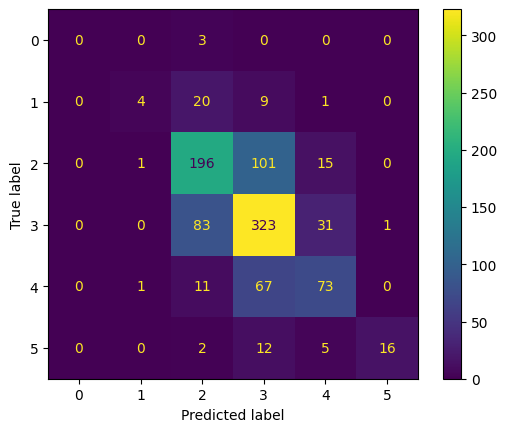

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="distance", n_neighbors=10, p=1)
knn.fit(X_train1, y_train.ravel())

y_pred = knn.predict(X_test1)

accuracy = accuracy_score(y_test.ravel(), y_pred)

print("Accuracy: " + str(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

## Neural Network

Tahn activation function raises the accuracy by about 2% but elongates the learning time 2x

Changing max_iter doesn't affect the results.

Accuracy: 0.6082051282051282


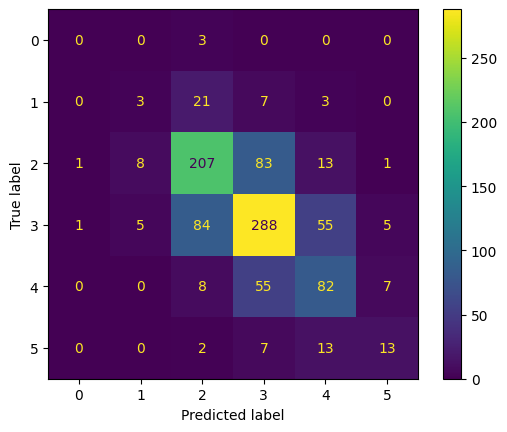

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', max_iter=1000)
mlp.fit(X_train1, y_train.ravel())

y_pred = mlp.predict(X_test1)

accuracy = accuracy_score(y_test.ravel(), y_pred)

print("Accuracy: " + str(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()